In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# constants in cgs
Gconst = 6.674e-8
Msun = 1.989e33
Rsun = 6.957e10
secday = 3600.0*24.0
secyear = secday * 365.25

In [3]:
data_dir = '../paperI/init_models/CE_paperI_StartingModel_12M_'

# 12 Msun giant

# 200 Rsun
file_dir = data_dir + '200R.data'
M12_200R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 250 Rsun
file_dir = data_dir + '250R.data'
M12_250R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 300 Rsun
file_dir = data_dir + '300R.data'
M12_300R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 350 Rsun
file_dir = data_dir + '350R.data'
M12_350R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 400 Rsun
file_dir = data_dir + '400R.data'
M12_400R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 450 Rsun
file_dir = data_dir + '450R.data'
M12_450R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 500 Rsun
file_dir = data_dir + '500R.data'
M12_500R = np.genfromtxt(file_dir, skip_header=5, names=True)


models = [M12_200R, M12_250R, M12_300R, M12_350R, M12_400R, M12_450R]
# models = [M12_200R, M12_250R, M12_300R, M12_350R, M12_400R, M12_450R, M12_500R]

### Calculate the binding energy

In [4]:
binding_energy = []
core_mass_h10 = []
core_mass_h50 = []
for k, model in enumerate(models):

    tmp = 0.0
    for i in range(len(model)):

        dm = model['dm'][i]
#         dm = 10**model['logdq'][i] * model['mass'][0]*Msun
                
        # Core mass definition: h abundance is above 10%
        if model['h1'][i] > 0.1:
            tmp += dm * (model['energy'][i] - Gconst * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun))
            core_mass_h10_tmp = model['mass'][i]*Msun

        # Core mass definition: h abundance is above 50%
        if model['h1'][i] > 0.3:
            tmp += dm * (model['energy'][i] - Gconst * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun))
            core_mass_h50_tmp = model['mass'][i]*Msun

    binding_energy.append(tmp)
    core_mass_h10.append(core_mass_h10_tmp)
    core_mass_h50.append(core_mass_h50_tmp)

binding_energy = np.array(binding_energy)
core_mass_h10 = np.array(core_mass_h10)
core_mass_h50 = np.array(core_mass_h50)

In [5]:
radii = []

for k, model in enumerate(models):
    radii.append(10**model['logR'][0])
    
    print(10**model['logR'][0])
    
radii = np.array(radii)

201.34090925956792
252.38735055638784
303.68030887861534
352.8746338020859
400.756833705482
450.136041186157


### Calculate the orbital energy

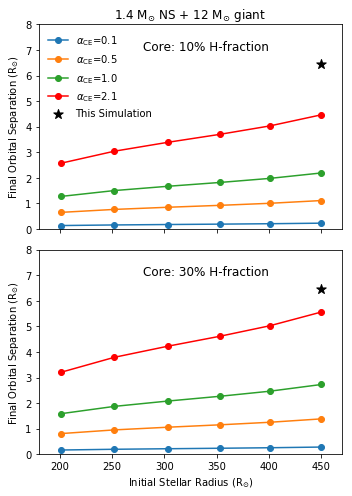

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(5,7))

alpha = [0.1, 0.5, 1.0, 2.1]
color = ["C0", "C1", "C2", 'r']

CO_mass = 1.4*Msun




for j in range(len(alpha)):
    orb_sep_f_h10 = []
    orb_sep_f_h50 = []
    
    for i, model in enumerate(models):

        a_i = 0.99 * 10**model[0]['logR'] * Rsun

        e_orb_i = -Gconst * (model[0]['mass']*Msun) * (CO_mass) / a_i
        e_orb_f = binding_energy[i] / alpha[j] + e_orb_i

        a_f_h10 = -Gconst * core_mass_h10[i] * (CO_mass) / e_orb_f
        a_f_h50 = -Gconst * core_mass_h50[i] * (CO_mass) / e_orb_f

        orb_sep_f_h10.append(a_f_h10 / Rsun)
        orb_sep_f_h50.append(a_f_h50 / Rsun)


    orb_sep_f_h10 = np.array(orb_sep_f_h10)
    orb_sep_f_h50 = np.array(orb_sep_f_h50)

    ax[0].plot(radii, orb_sep_f_h10, 'o-', color=color[j], label=r'$\alpha_{\rm CE}$='+str(alpha[j]))    
    ax[1].plot(radii, orb_sep_f_h50, 'o-', color=color[j], label=r'$\alpha_{\rm CE}$='+str(alpha[j]))    
#     plt.scatter(radii, orb_sep_f, color=color[j], label=r'$\alpha_{\rm CE}$='+str(alpha[j]))


for a in ax:
    a.scatter([450.0],[6.4675], marker='*', s=100, color='k', label='This Simulation')


ax[1].set_xlabel(r"Initial Stellar Radius (R$_{\odot}$)")
ax[0].set_ylabel(r"Final Orbital Separation (R$_{\odot}$)")
ax[1].set_ylabel(r"Final Orbital Separation (R$_{\odot}$)")

ax[0].set_xticklabels([])

ax[0].legend(frameon=False, loc=2)
ax[0].set_xlim(180, 470)
ax[0].set_ylim(0, 8)
ax[1].set_xlim(180, 470)
ax[1].set_ylim(0, 8)
ax[0].set_title(r"1.4 M$_{\odot}$ NS + 12 M$_{\odot}$ giant")

ax[0].text(280, 7.0, 'Core: 10% H-fraction', fontsize=12)
ax[1].text(280, 7.0, 'Core: 30% H-fraction', fontsize=12)

plt.tight_layout()
plt.savefig("../figures/predicted_separations_final.pdf")
# plt.show()

### Energetics

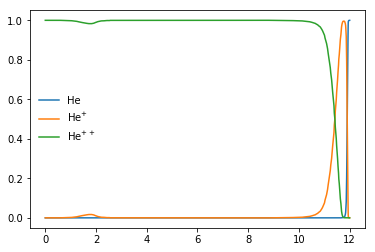

In [13]:
model = M12_450R

H_neutral = model['neutral_fraction_H']
He_neutral = model['neutral_fraction_He']
He_charge = model['avg_charge_He']

# He_one + He_two + He_neutral = 1.0
# He_one + 2.0*He_two = He_charge

# He_two = 1.0 - He_neutral - He_one
# He_one + 2.0 * (1.0 - He_neutral - He_one) = He_charge

He_one = 2.0 - 2.0*He_neutral - He_charge
He_two = He_two = 1.0 - He_neutral - He_one


plt.plot(model['mass'], He_neutral, label='He')
plt.plot(model['mass'], He_one, label=r'He$^{+}$')
plt.plot(model['mass'], He_two, label=r'He$^{++}$')
plt.legend(frameon=False)

plt.show()


# for i in range(5):
#     print(He_one[-i], He_two[-i], He_neutral[-i])

# print(model.dtype.names7
# print(model['avg_charge_He'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


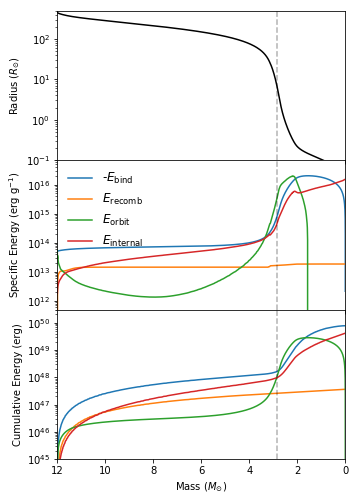

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(5,7))






ax[0].plot(model['mass'], model['radius'], color='k')
# ax[0].axvline(model['mass'][i], color='k', linestyle='dashed', alpha=0.3)
ax[0].axvline(2.85, color='k', linestyle='dashed', alpha=0.3)
ax[0].set_yscale('log')
ax[0].set_ylim(0.1, 500)
ax[0].set_xlim(12, 0)
# ax[0].set_xlabel(r'Mass ($M_{\odot}$)')
ax[0].set_ylabel(r'Radius ($R_{\odot}$)')
ax[0].set_xticklabels([])



CO_mass = 1.4*Msun

avogadro = 6.022e23
H_weight = 1.008
He_weight = 4.0026

erg_to_ev = 6.242e11


E_bind = Gconst * model['mass']*Msun / (10**model['logR']*Rsun)


E_recomb = 54.4*He_two / He_weight * model['y_mass_fraction_He'] * avogadro  \
            + 24.6*(He_one + He_two) / He_weight * model['y_mass_fraction_He'] * avogadro  \
            + 13.6*(1.0-H_neutral) / H_weight * model['x_mass_fraction_H'] * avogadro
E_recomb = E_recomb / erg_to_ev

E_internal = model['energy'] - E_recomb


rad = np.append(10**model['logR'], 0.0)
mass = np.append(model['mass'], 0.0)

E_orb = np.zeros(len(model))
for i in range(len(model)):
    E_orb[i] = -Gconst * CO_mass * ((mass[i]*Msun) / (2.0*rad[i]*Rsun) - (mass[i+1]*Msun) / (2.0*rad[i+1]*Rsun)) / model['dm'][i]


ax[1].plot(model['mass'], E_bind, label=r'-$E_{\rm bind}$')
ax[1].plot(model['mass'], E_recomb, label=r'$E_{\rm recomb}$')
ax[1].plot(model['mass'], E_orb, label=r'$E_{\rm orbit}$')
ax[1].plot(model['mass'], E_internal, label=r'$E_{\rm internal}$')


# Add line for core
for i in range(len(model)):
    if model['y_mass_fraction_He'][i] > 0.5:
        break
# ax[1].axvline(model['mass'][i], color='k', linestyle='dashed', alpha=0.3)
ax[1].axvline(2.85, color='k', linestyle='dashed', alpha=0.3)


# ax[1].set_xlabel(r'Mass ($M_{\odot}$)')
ax[1].set_ylabel(r'Specific Energy (erg g$^{-1}$)')

ax[1].set_yscale('log')

# ax[1].set_title('Radius = 450 $R_{\odot}$')

ax[1].set_xlim(12, 0)
ax[1].set_ylim(5.0e11, 7.0e16)

ax[1].legend(fontsize=12, frameon=False)
ax[1].set_xticklabels([])





# Cumulative
# E_orbital_cumulative = Gconst * CO_mass * (model['mass']*Msun) / (2.0*model['radius']*Rsun)
E_orbital_cumulative = Gconst * CO_mass * ((model['mass']*Msun) / (2.0*model['radius']*Rsun) - (model['mass'][0]*Msun) / (2.0*model['radius'][0]*Rsun))



ax[2].plot(model['mass'], np.cumsum(E_bind*model['dm']), label=r'-$E_{\rm bind}$')
ax[2].plot(model['mass'], np.cumsum(E_recomb*model['dm']), label=r'$E_{\rm recomb}$')
ax[2].plot(model['mass'], E_orbital_cumulative, label=r'$E_{\rm orbit}$')
ax[2].plot(model['mass'], np.cumsum(E_internal*model['dm']), label=r'$E_{\rm internal}$')

ax[2].set_yscale('log')
ax[2].set_ylim(1.0e45, 3.0e50)

ax[2].set_xlabel(r'Mass ($M_{\odot}$)')
ax[2].set_ylabel(r'Cumulative Energy (erg)')

ax[2].set_xlim(12, 0)

# ax[2].axvline(model['mass'][i], color='k', linestyle='dashed', alpha=0.3)
ax[2].axvline(2.85, color='k', linestyle='dashed', alpha=0.3)

fig.subplots_adjust(hspace=0, left=0.15, right=0.95, top=0.97, bottom=0.08)

# plt.tight_layout()
# plt.savefig("../figures/energies_compare.pdf")
plt.show()